## The following packages are used for the code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

## 1a) Plotting sunspot data from the given dataset.

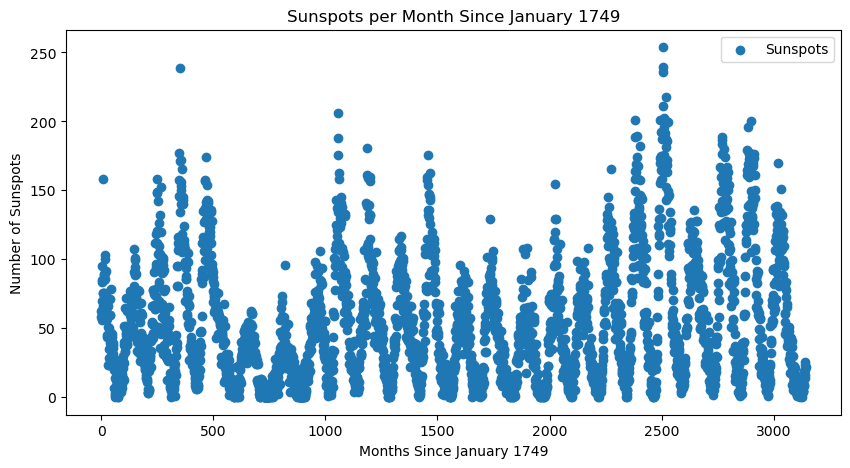

In [2]:
# This box of code will load the data from sunspots.txt and plot it as a scatterplot

# Loading sunspots.txt
sunspot_data = np.loadtxt("sunspots.txt")

# Creating scatterplot, xy labels, and title
plt.figure(figsize=(10,5))
plt.scatter(sunspot_data[:,0],sunspot_data[:,1],label='Sunspots')
plt.xlabel("Months Since January 1749")
plt.ylabel("Number of Sunspots")
plt.title("Sunspots per Month Since January 1749")
plt.legend()
plt.show()

## The above plot represents the number of sunspots observed per month since January 1749.

## 1b)

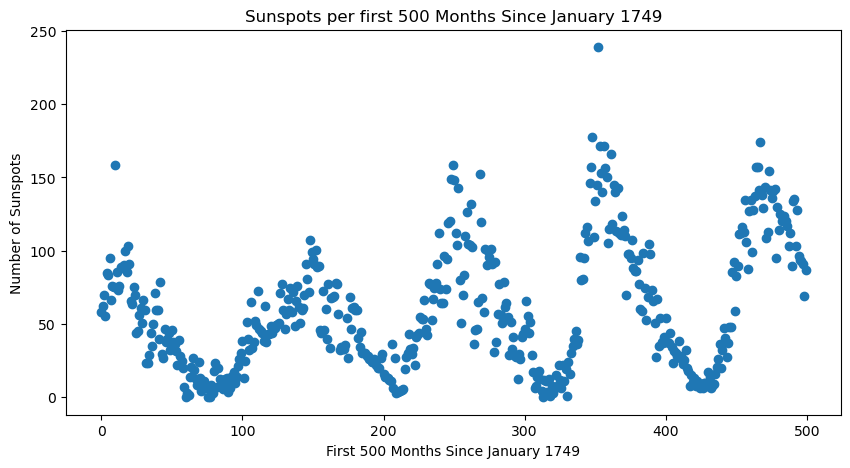

In [3]:
# This box of code will plot the first five peaks in the sunspots.txt data

# Creating scatterplot, xy labels, and title
plt.figure(figsize=(10,5))
plt.scatter(sunspot_data[0:500,0],sunspot_data[0:500,1])
plt.xlabel("First 500 Months Since January 1749")
plt.ylabel("Number of Sunspots")
plt.title("Sunspots per first 500 Months Since January 1749")
plt.show()

## Above are the first 500 data points from the sunspots dataset. This clearly shows the first five peaks in data.

## 1c) 

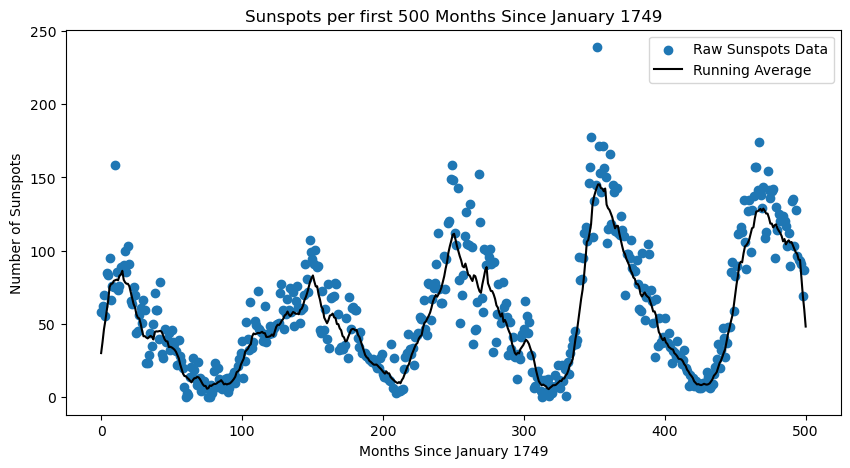

In [4]:
# This box of code will calculate and plot the running average of the first five peaks of the sunspot data

# This function calculates the running average of the input data and puts the result in a list
def RunningAverage(data_input):
    
    r = 5
    
    running_average_list = []
    
    for i in np.arange(0,len(data_input)):
        if i == 0:
            running_average = sum(data_input[i : i + r]) / (2*r+1)
            running_average_list.append(running_average)
        elif i == 1:
            running_average = sum(data_input[i - 1 : i + r]) / (2*r+1)
            running_average_list.append(running_average)
        elif i == 2:
            running_average = sum(data_input[i - 2 : i + r]) / (2*r+1)
            running_average_list.append(running_average)
        elif i == 3:
            running_average = sum(data_input[i - 3 : i + r]) / (2*r+1)
            running_average_list.append(running_average)
        elif i == 4:
            running_average = sum(data_input[i - 4 : i + r]) / (2*r+1)
            running_average_list.append(running_average)
        elif i == 496:
            running_average = sum(data_input[i - r : i + 4]) / (2*r+1)
            running_average_list.append(running_average)
        elif i == 497:
            running_average = sum(data_input[i - r : i + 3]) / (2*r+1)
            running_average_list.append(running_average)
        elif i == 498:
            running_average = sum(data_input[i - r : i + 2]) / (2*r+1)
            running_average_list.append(running_average)
        elif i == 499:
            running_average = sum(data_input[i - r : i + 1]) / (2*r+1)
            running_average_list.append(running_average)
        elif i == 500:
            running_average = sum(data_input[i - r : i]) / (2*r+1)
            running_average_list.append(running_average)
        else:
            running_average = sum(data_input[i - r : i + r]) / (2*r+1)
            running_average_list.append(running_average)
    
    return running_average_list

plt.figure(figsize=(10,5))
plt.scatter(sunspot_data[0:500,0],sunspot_data[0:500,1],label='Raw Sunspots Data')
plt.plot(np.linspace(0,500,500),RunningAverage(sunspot_data[0:500,1]),color='k',label='Running Average')
plt.xlabel("Months Since January 1749")
plt.ylabel("Number of Sunspots")
plt.title("Sunspots per first 500 Months Since January 1749")
plt.legend()
plt.show()

## Above is the running average of the data plotted along with the original 500 data points.

## 2a)

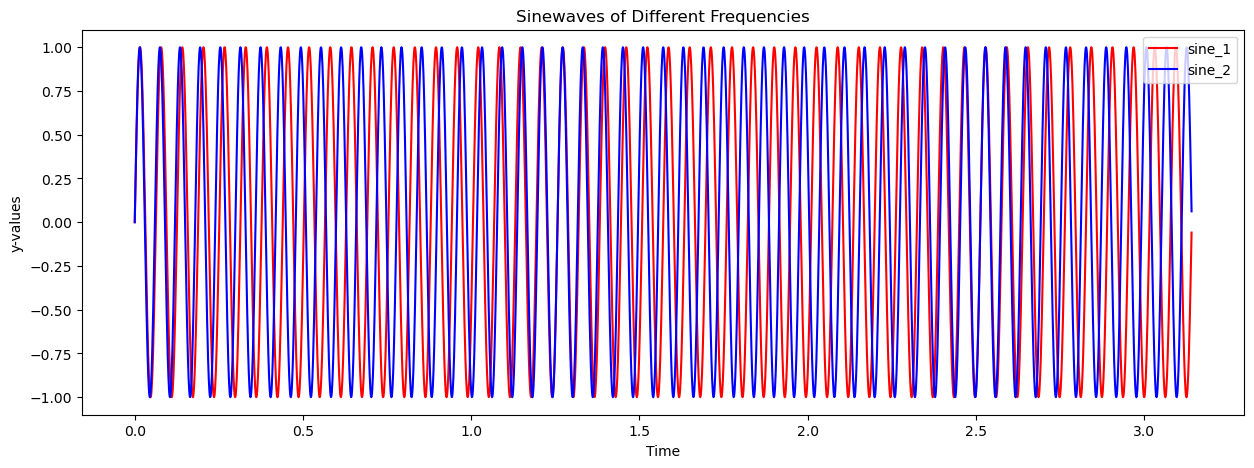

Here the two sinewaves of frequency 100Hz and 105Hz are plotted as separate waves on the same figure.


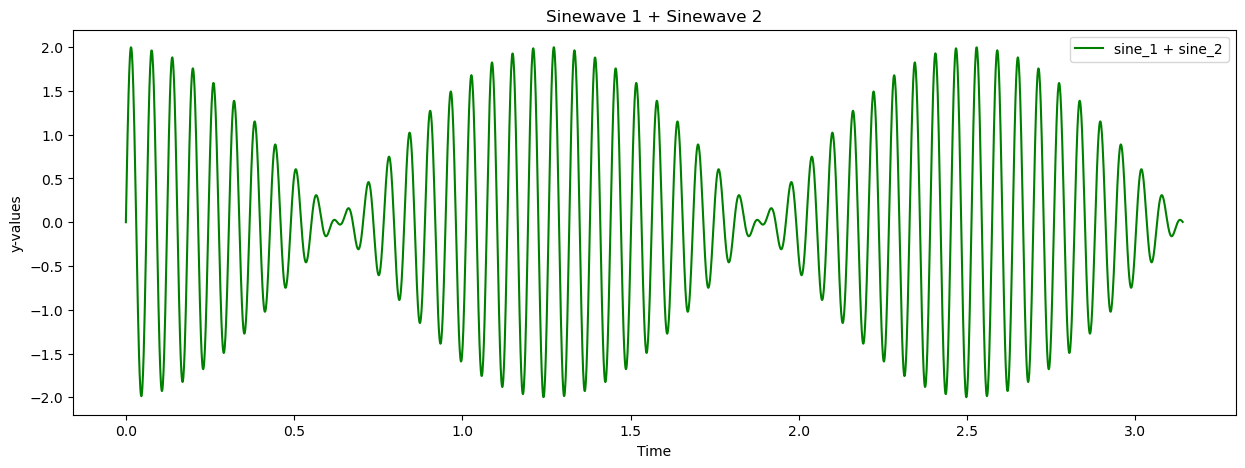

Now the two sinewaves of frequency 100Hz and 105Hz are combined into a single wave and plotted. The interference pattern is the resulting plot.


In [5]:
# This box of code will create two separate sine waves of different frequencies, plot them,
# then plot the combined wave

# Sine wave with frequency of 100Hz
f1 = 100 # Hz
# Sine wave with frequency of 105Hz
f2 = 105 # Hz

# x-axis will represent time
# values have a step count of 0.001 because it makes the waves cleaner
time = np.arange(0, np.pi ,0.001)

# different y points are created for both waves of different frequencies
wave1_ypoints = np.sin(f1*time)
wave2_ypoints = np.sin(f2*time)

# The time a y points are plotted as two separate sinewaves
# Figure size makes the figure large so the waves are not crunched together
plt.figure(figsize=(15,5))
plt.xlabel("Time")
plt.ylabel("y-values")
plt.title("Sinewaves of Different Frequencies")
plt.plot(time,wave1_ypoints,'-r',label='sine_1')
plt.plot(time,wave2_ypoints,'-b',label='sine_2')
plt.legend(loc='upper right')
plt.show()

print("Here the two sinewaves of frequency 100Hz and 105Hz are plotted as separate waves on the same figure.")

# Now the interference pattern will be created by adding the y points of both waves
wave_interference = wave1_ypoints + wave2_ypoints

# The interference pattern will be plotted on the same timescale, but will be a single combined wave
plt.figure(figsize=(15,5))
plt.xlabel("Time")
plt.ylabel("y-values")
plt.title("Sinewave 1 + Sinewave 2")
plt.plot(time, wave_interference,'-g',label='sine_1 + sine_2')
plt.legend(loc='upper right')
plt.show()

print("Now the two sinewaves of frequency 100Hz and 105Hz are combined into a single wave and plotted."
     ,"The interference pattern is the resulting plot.")

## 2b)

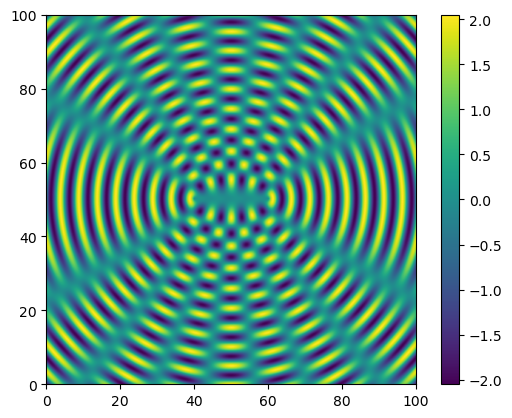

In [6]:
# This box of code will create a 2D interferance plot based on the sinewaves from part 2a)

# Setting wavelength and calculting wavenumber
wavelength = 5.0
k = 2 * np.pi / wavelength

# Setting 
x1 = 1.0
x2 = 1.05

center_distance = 20.0  # distance between centers
image_size = 100.0  # size of image
points = 500

spacing = image_size / points # spacing of points

# Calc positions of centers
horizontal_pos_1 = image_size/2 + center_distance/2
vertical_pos_1 = image_size/2
horizontal_pos_2 = image_size/2 - center_distance/2
vertical_pos_2 = image_size/2

# Array will hold the "height" of the waves
heights = np.empty([points, points],float)

# This loop will calculate the radius of each wave
for i in np.arange(points):
    y = spacing * i
    for j in np.arange(points):
        x = spacing * j
        radius_1 = np.sqrt((x-horizontal_pos_1)**2 + (y-vertical_pos_1)**2)
        radius_2 = np.sqrt((x-horizontal_pos_2)**2 + (y-vertical_pos_2)**2)
        heights[i,j] = x1 * np.sin(k * radius_1) + x2 * np.sin(k * radius_2)    

# Creating plot
plt.imshow(heights, origin="lower", extent=[0, image_size, 0, image_size])
plt.colorbar()
plt.show()


## Above is the interference pattern of the two waves in a 2D plot. The colorbar serves as a legend for the heights of the waves. 

## 3a) Here the data from a Scanning Tunneling Microscope is plotted to display the structure of silicon.

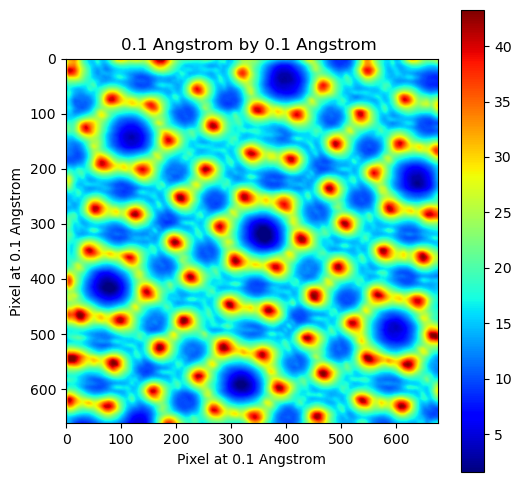

In [7]:
# This box of code will load the stm.txt data and plot it using imshow
stm_measurement_data = np.loadtxt("stm.txt")

# Plotting the data
plt.figure(figsize=(6,6))
plt.xlabel("Pixel at 0.1 Angstrom")
plt.ylabel("Pixel at 0.1 Angstrom")
plt.title("0.1 Angstrom by 0.1 Angstrom ")
plt.imshow(stm_measurement_data, cmap = 'jet')
plt.colorbar()
plt.show()

## These hexagonal shapes and interconnecting dots show the silicon structure in 2D.

## 3b) This code will display a zoomed in image of the silicon stucture to replicate the silicon crystal lattice shown below.

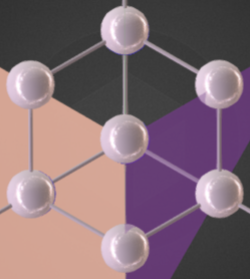

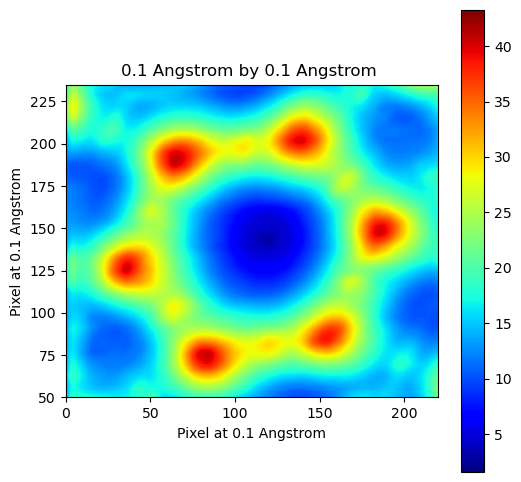

In [8]:
# This is mostly the same code as part 3a) with exception of xlim and y lim to zoom into the image
plt.figure(figsize=(6,6))
plt.xlabel("Pixel at 0.1 Angstrom")
plt.ylabel("Pixel at 0.1 Angstrom")
plt.title("0.1 Angstrom by 0.1 Angstrom ")
plt.imshow(stm_measurement_data, cmap = 'jet')
plt.xlim(0,220)
plt.ylim(50,235)
plt.colorbar()
plt.show()

## As can be seen above, the zoomed in plot of the hexogonal shape matches the structure of the silicon.

## 4a)

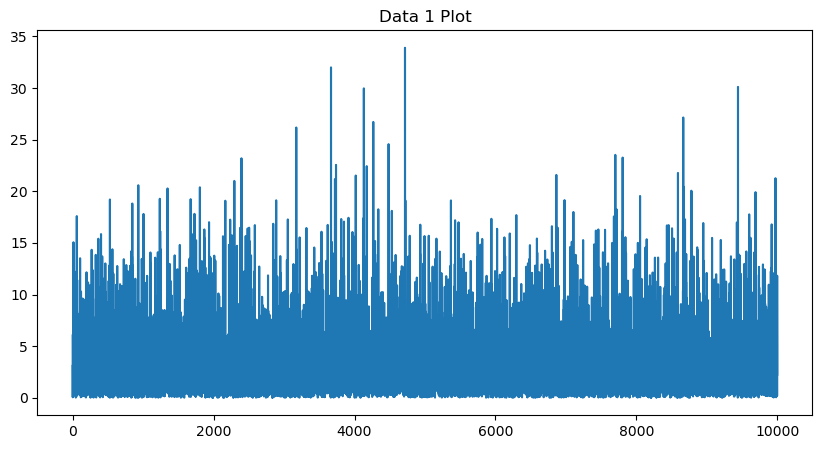

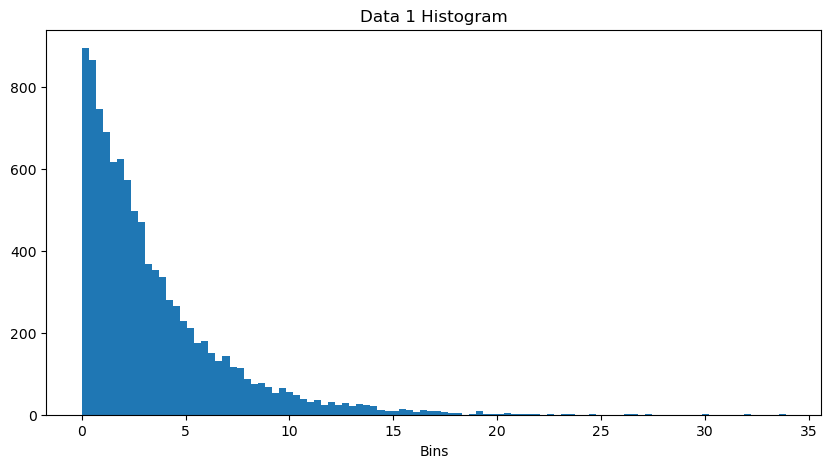

In [9]:
# This box of code will plot code3data1 as an xy plot and histogram

# Loading code3data1.txt
code_data1 = np.loadtxt("code3data1.txt")

# Plotting
plt.figure(figsize=(10,5))
plt.plot(code_data1)
plt.title("Data 1 Plot")
plt.show()

plt.figure(figsize=(10,5))
plt.hist(code_data1,bins=100)
plt.title("Data 1 Histogram")
plt.xlabel("Bins")
plt.show()

## As can be seen in the "Data 1 Plot" the data doesn't make much sense when it is plotted as a regular xy plot.

## Below the plot is the "Data 1 Histogram" which gives a much better representation of the data. The distribution created by the data is a left skewed distribution.

## 4b)

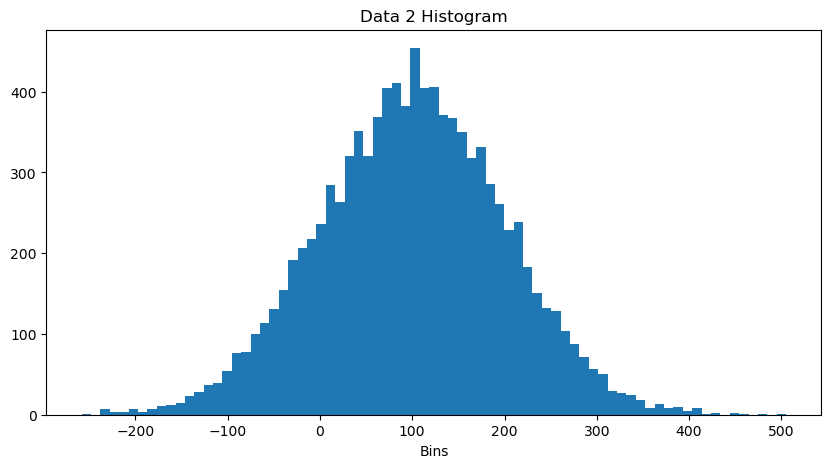

In [10]:
# This box of code will plot code3data2 as a histogram

# Loading code3data2.txt
code_data2 = np.loadtxt("code3data2.txt")

# Plotting
plt.figure(figsize=(10,5))
plt.hist(code_data2,bins=75)
plt.title("Data 2 Histogram")
plt.xlabel("Bins")
plt.show()

## As can be seen in "Data 2 Histogram", the distribution that the data creates is a gaussian/bell curve. The average of the data set is about 100 with values within the first standard deviation falling between 0-200.

## 4c)

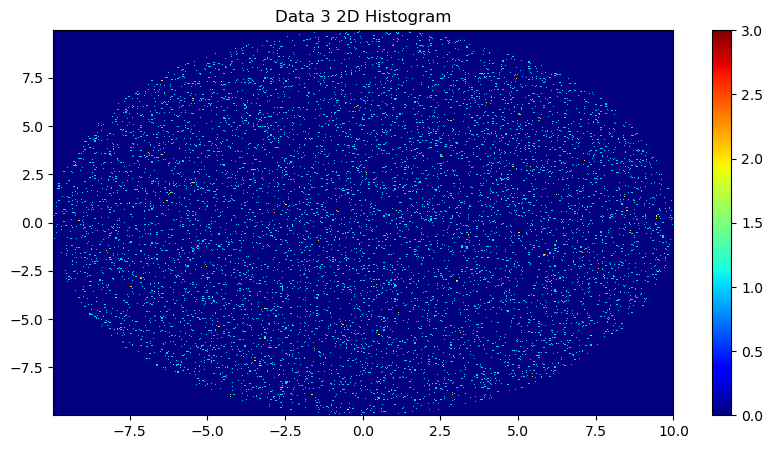

In [11]:
# This box of code will plot code3data3 as a 2D histogram

# Loading code3data3.txt
code_data3 = np.loadtxt("code3data3.txt")

 # Plotting
plt.figure(figsize=(10,5))
plt.hist2d(code_data3[:,0],code_data3[:,1],bins=500, cmap='jet')
plt.colorbar()
plt.title("Data 3 2D Histogram")
plt.show()

## Above is the "Data 3 2D Histogram" which appears to be an image of stars and other celestial objects in space.

## 5a)

In [12]:
# This array represents data of the photoelectric effect
photoelectric_data = np.array([[5.4874e14, 0.5309],[6.931e14, 1.0842]
                               ,[7.4307e14, 1.2734],[8.2193e14, 1.6598]
                               ,[9.6074e14, 2.19856],[1.184e15, 3.10891]])

# Array created
print(photoelectric_data)

# The array is being saved to a .txt file
np.savetxt("PhotoelectricData.txt", photoelectric_data, fmt="%10.3f", delimiter = " ")

[[5.48740e+14 5.30900e-01]
 [6.93100e+14 1.08420e+00]
 [7.43070e+14 1.27340e+00]
 [8.21930e+14 1.65980e+00]
 [9.60740e+14 2.19856e+00]
 [1.18400e+15 3.10891e+00]]


## Here an array was created containing values of frequency and voltage from the photoelectric effect. The array was saved onto a .txt file.

## 5b)

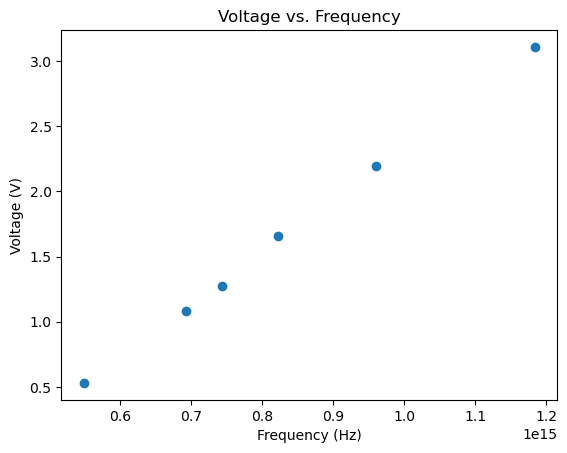

In [13]:
# This box of code will plot the voltage vs frequency data from the photoelectric data

frequency = photoelectric_data[:,0]
voltage = photoelectric_data[:,1]

# Plotting the Voltage vs. Frequency on 
plt.scatter(frequency, voltage)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs. Frequency")
plt.show()

## Above a plot was created for the previously mentioned photoelectric data array with Voltage on the y-axis and Frequency on the x-axis. This creates an almost linear shape.

## 5c)

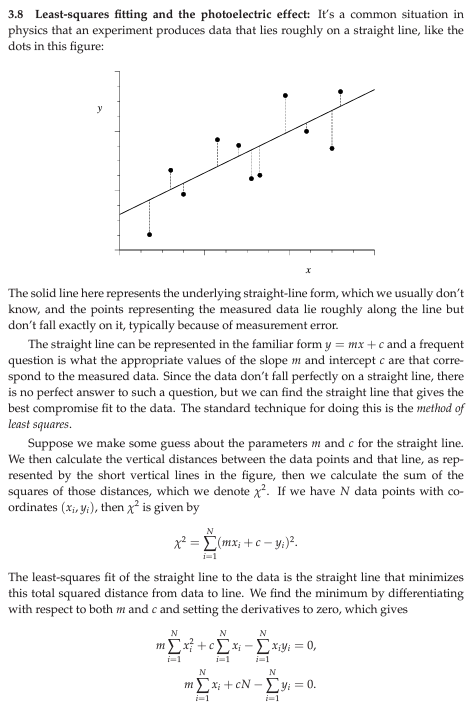

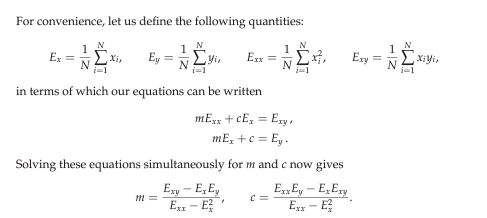

## The sum of least squares is a method of fitting tries to generate a fit that minimizes the squared distance from the fit to each data point. This is achieved by using the slope-intercept formula, $y = mx + c$. Manipulating the formula by differentiating with respect to slope and the y-intercept, gives various sums that if set to 0 will give the minimum values, and therefore will give the fit with the minimum distance to each data point. With algebra, these sums can be used to calculated the best fit slope and y-intercept to get the least-square fit.

## 5d)

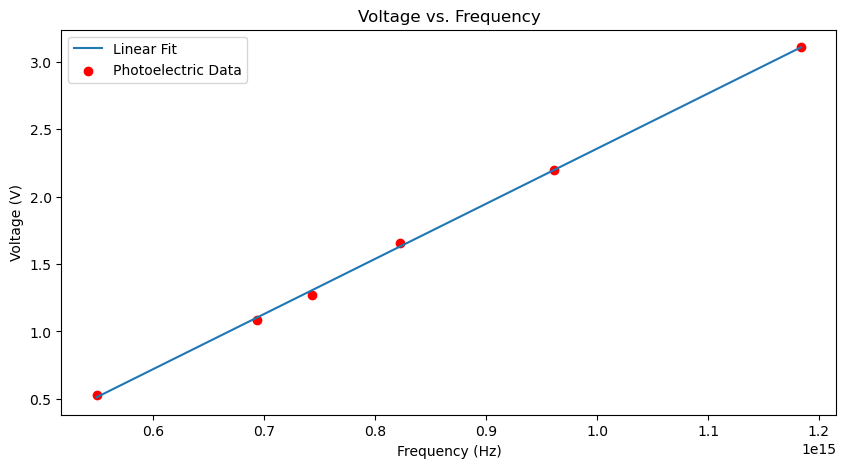

In [14]:
# This box of code will create a line fit using the sum of least squares method

# Sum of least squares function
def SumOfLeastSquares(data):
    
    # number of items being summed
    N = len(data)
    
    # x and y data in input array
    x = data[:,0]
    y = data[:,1]
    
    # Calculating the sums
    E_x = sum(x) / N
    E_y = sum(y) / N
    E_xx = sum(x**2) / N
    E_xy = sum(x * y) / N
    
    # Calculating slope
    slope = (E_xy - E_x*E_y) / (E_xx - E_x**2)
    
    # Calculating y_intercept
    y_intercept = (E_xx*E_y - E_x*E_xy) / (E_xx - E_x**2)
    
    # Return calculated values
    return slope, y_intercept

# This function generates x-values for a linear fit
def BestFitLinear(slopes, y_intercept, x_values):
    y = slopes * x_values + y_intercept
    return y

# Generating y-values based on fit
linear_fit = BestFitLinear(SumOfLeastSquares(photoelectric_data)[0]
                           , SumOfLeastSquares(photoelectric_data)[1]
                           , frequency)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(frequency,linear_fit,label='Linear Fit')
plt.scatter(frequency, voltage, color='r', label='Photoelectric Data')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs. Frequency")
plt.legend()
plt.show()

## Above is the photoelectric data plotted with a linear fit. This fit uses the sum of least squares. It looks to be a good fit of the data.

## 5e)

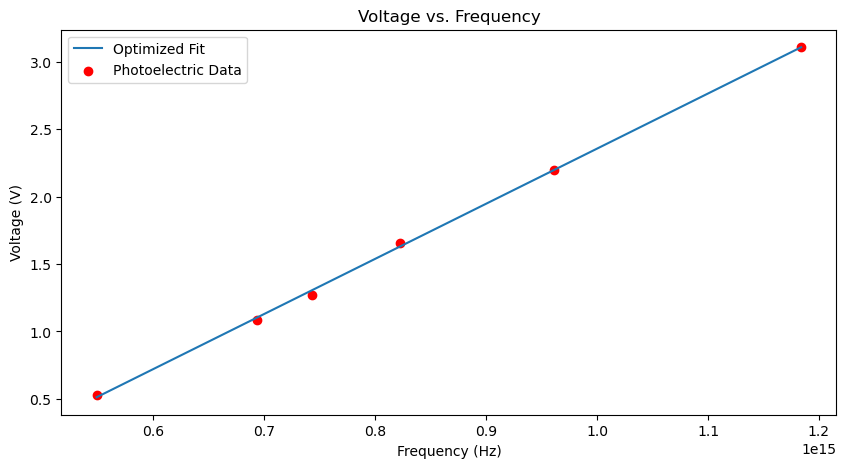

In [20]:
# This box of code will create a linear fit of the photoelectric data using scipy

# Initial values
best_fit_slope = SumOfLeastSquares(photoelectric_data)[0]
best_fit_y_intercept = SumOfLeastSquares(photoelectric_data)[1]
initial_values = (best_fit_slope , best_fit_y_intercept)

# Scipy Optimize
paramfit, paramErr = optimize.curve_fit(BestFitLinear,
                                        voltage,
                                        frequency, 
                                        initial_values)

# Calculating optimized fit
optimized_fit = BestFitLinear(paramfit[0], paramfit[1], frequency)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(frequency, optimized_fit, label='Optimized Fit')
plt.scatter(frequency, voltage, color='r', label='Photoelectric Data')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs. Frequency")
plt.legend()
plt.show()

## The above plot consists of the original photoelectric dataset and the optimized fit using scipy. As can be seen, this fit looks identical to the fit created in part 5d. This is because the initial values used for this fit were the values calculated in part 5d. When trying different inital values, the fit was completely off even if they were only slightly different from these values.

## 6a)

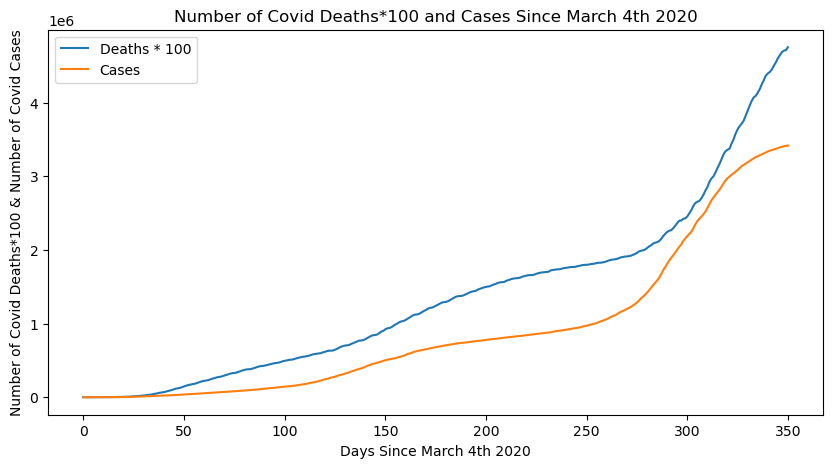

In [16]:
# This box of code will load in the Covid data and plot it

# Loading in the Covid Data from a .csv file
Deaths, Cases = np.loadtxt("CovidData.csv", int, skiprows=1, usecols=(1,2), delimiter=",", unpack=True)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(range(0,len(Deaths)), Deaths[::-1] * 100, label="Deaths * 100")
plt.plot(range(0,len(Cases)), Cases[::-1], label="Cases")
plt.xlabel("Days Since March 4th 2020")
plt.ylabel("Number of Covid Deaths*100 & Number of Covid Cases")
plt.title("Number of Covid Deaths*100 and Cases Since March 4th 2020")
plt.legend()
plt.show()

## Above of the Covid cases and deaths data from the CovidData.csv file plotted on a single plot. Since the cases are a higher order of magnitude than the deaths, it was necessary to multiply the deaths by 100 to fit them on the same plot scale.

## 6b)

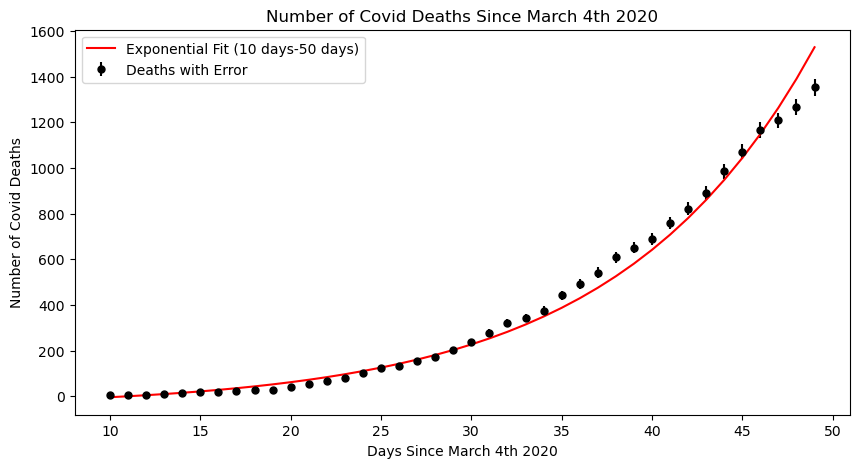

In [17]:
# This box of code will create an exponential fit for Covid Deaths between the first 10-50 days since March 14, 2022

# Setting a timer period of days
start_day_1 = 10
end_day_1 = 50
days_1 = range(start_day_1, end_day_1)

# Flipping the Death data so it goes from lowest to highest
Deaths_flipped = Deaths[::-1]

# Calculating the Gaussian Error in Death data
error_deaths = np.sqrt(Deaths_flipped)

# Exponential Function to fit data
def Exponential(t, a, b, c):
    return  a + b*np.exp(c*t)

# Initial Values
initial_values_1 = (0, 100, 0.1)

# Scipy Optimize function returns best fit values and calculated error
paramfitWithErr_1, paramErr_1 = optimize.curve_fit(Exponential
                                                   , days_1
                                                   , Deaths_flipped[start_day_1:end_day_1]
                                                   , initial_values_1
                                                   , sigma=error_deaths[start_day_1:end_day_1])


# Creating the y-values for the optimized fit
optimized_fit_1 = Exponential(days_1
                              , paramfitWithErr_1[0]
                              , paramfitWithErr_1[1]
                              , paramfitWithErr_1[2])

# Creating error bars and setting figsize
plt.figure(figsize=(10,5))
plt.errorbar(days_1
             , Deaths_flipped[start_day_1:end_day_1]
             , error_deaths[start_day_1:end_day_1]
             , ls='',marker='o', mfc='black',ms=5,mec='black',ecolor='black',label="Deaths with Error")

# Plotting the fitted curve with the data
plt.plot(days_1, optimized_fit_1, "r", label="Exponential Fit (10 days-50 days)")
plt.xlabel("Days Since March 4th 2020")
plt.ylabel("Number of Covid Deaths")
plt.title("Number of Covid Deaths Since March 4th 2020")
plt.legend()
plt.show()

## The above plot shows Covid deaths 10-50 days after March 4th 2020, represented by the blue dots. The red line is an exponential fit to this data using scipy's optimize function. The fit doesn't appear to be terrible, but it falls well outside of the errorbars in many parts.

## 6c)

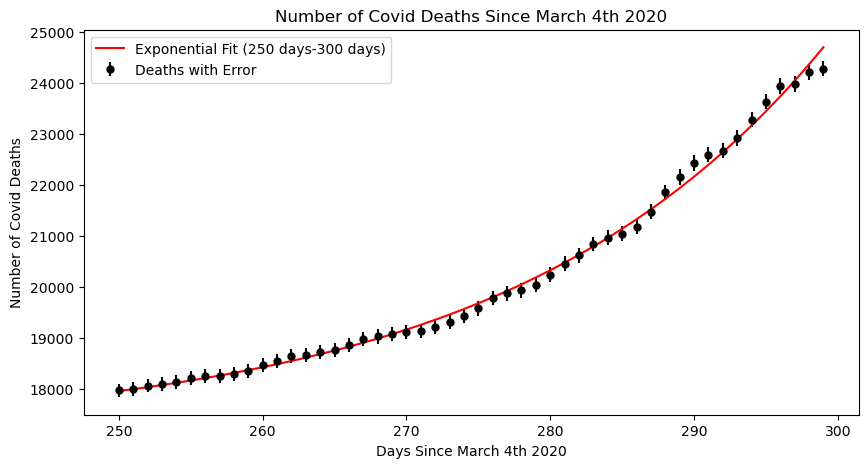

In [18]:
# This box of code will create an exponential fit for Covid Deaths between the first 10-50 days since March 14, 2022

# Setting a timer period of days
start_day_2 = 250
end_day_2 = 300
days_2 = range(start_day_2, end_day_2)

# Initial Values
initial_values_2 = (10, 100, 0.01)

# Scipy Optimize function returns best fit values and calculated error
paramfit_2, paramErr_2 = optimize.curve_fit(Exponential, 
                                        days_2, 
                                        Deaths_flipped[start_day_2:end_day_2],
                                        initial_values_2)

# Creating the y-values for the optimized fit
optimized_fit_2 = Exponential(days_2, paramfit_2[0], paramfit_2[1], paramfit_2[2])

# Plotting the fitted curve with the data and error
plt.figure(figsize=(10,5))
plt.errorbar(days_2
             , Deaths_flipped[start_day_2:end_day_2]
             , error_deaths[start_day_2:end_day_2]
             , ls='',marker='o', mfc='black',ms=5,mec='black',ecolor='black',label="Deaths with Error")
plt.plot(days_2, optimized_fit_2, "r", label="Exponential Fit (250 days-300 days)")
plt.xlabel("Days Since March 4th 2020")
plt.ylabel("Number of Covid Deaths")
plt.title("Number of Covid Deaths Since March 4th 2020")
plt.legend()
plt.show()

## The above plot shows Covid deaths 250-300 days after March 4th 2020, represented by the blue dots. The red line is an exponential fit to this data using scipy's optimize function. The same technique for the plot in 6b was used for the plot above. This fit is much better, it falls mostly within the error of the data.

## 6d)

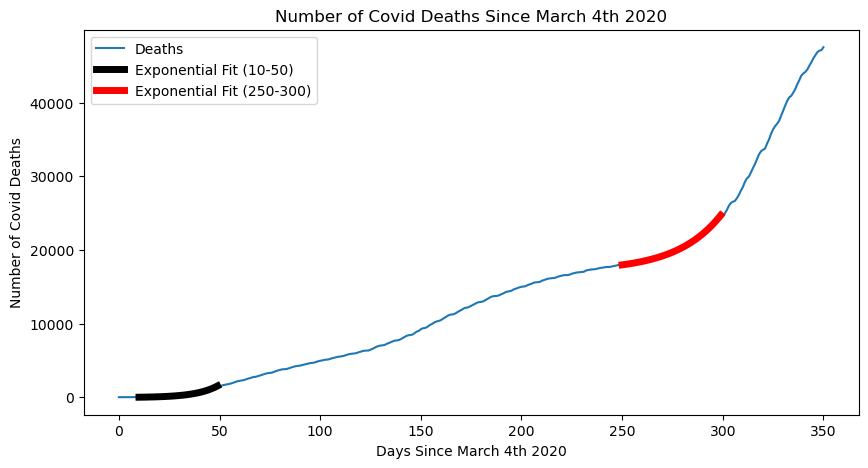

In [19]:
# This box of code will plot both plots from 6b and 6c onto a single plot

# Plotting
plt.figure(figsize=(10,5))
plt.plot(range(0,len(Deaths)), Deaths_flipped, label="Deaths")
plt.plot(days_1, optimized_fit_1, "k", label="Exponential Fit (10-50)", linewidth=5)
plt.plot(days_2, optimized_fit_2, "r", label="Exponential Fit (250-300)", linewidth=5)
plt.xlabel("Days Since March 4th 2020")
plt.ylabel("Number of Covid Deaths")
plt.title("Number of Covid Deaths Since March 4th 2020")
plt.legend()
plt.show()

## Above, the entire Death data is plotted along with the two exponential fits created in 6b and 6c. The fits appear to track the data well.